In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
v_df = pd.read_csv('/kaggle/input/vehicles-uk/df_VEH0120_UK.csv')

In [3]:
new_column_order = ['BodyType', 'Make', 'GenModel', 'Model', 'Fuel', 'LicenceStatus', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']
df = v_df[new_column_order]
df

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2015Q1,2015Q2,2015Q3,2015Q4,...,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,Licensed,0,0,0,0,...,18,16,18,18,17,17,17,17,16,16
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,SORN,0,0,0,0,...,2,3,2,2,2,3,3,3,4,4
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,Licensed,0,0,0,0,...,28,26,27,27,28,25,26,28,27,26
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,SORN,0,0,0,0,...,1,3,1,1,1,3,2,1,2,3
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,Licensed,0,0,0,0,...,1021,999,997,1012,1007,993,1000,1008,1002,964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199794,Motorcycles,ZONTES,ZONTES ZT,ZT 310-M,Petrol,SORN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
199795,Motorcycles,ZONTES,ZONTES ZT,ZT 350 GK,Petrol,Licensed,0,0,0,0,...,0,0,0,1,13,25,37,49,53,51
199796,Motorcycles,ZONTES,ZONTES ZT,ZT 350 GK,Petrol,SORN,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
199797,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,Petrol,Licensed,0,0,0,0,...,0,0,0,0,7,14,25,41,44,43


In [5]:
filtered_df = df[(df['BodyType'] == 'Cars') & (df['LicenceStatus'] == 'Licensed')]

# Select the desired columns
selected_columns = ['Fuel', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']
filtered_df = filtered_df[selected_columns]

In [6]:
# Create a list of quarter columns
quarter_columns = [f'20{year}Q{quarter}' for year in range(15, 24) for quarter in range(1, 5)]

# Group the DataFrame by "Fuel" and sum the values in each quarter column
grouped_df = filtered_df.groupby("Fuel")[quarter_columns].sum().reset_index()

grouped_df

,Fuel,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,...,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4
0,Battery electric,14583,16319,18325,20958,23757,25338,27943,29720,33514,...,315024,379220,441166,492150,547504,628984,701117,779420,863643,930649
1,Diesel,11391062,11591794,11795542,11927582,12124967,12310309,12486394,12574071,12730312,...,12272067,12146239,12026564,11939380,11837381,11746622,11597982,11498138,11351945,11227758
2,Fuel cell electric,17,18,20,26,34,36,32,34,51,...,219,215,220,191,189,153,170,143,134,137
3,Gas,42731,42751,42019,40242,39082,38799,37839,35966,34985,...,25053,24194,24810,26370,26647,26564,26957,27931,28158,27451
4,Hybrid electric (diesel),7665,8593,9401,9805,10081,10368,10599,10861,10981,...,52742,58361,65645,71643,78415,83950,89353,93403,96810,99626
5,Hybrid electric (petrol),186881,196672,207000,215180,227402,238867,252133,261569,279465,...,833206,874450,954754,1036575,1120697,1187210,1280796,1374946,1497639,1602987
6,Other fuel types,401,405,406,404,398,397,397,383,382,...,299,288,284,286,286,275,262,262,263,260
7,Petrol,19012827,19068458,19058107,18928849,18927371,18960124,18949429,18824614,18871198,...,19223576,19084944,19075698,19164586,19152728,19099791,19127301,19243261,19239537,19151042
8,Plug-in hybrid electric (diesel),275,303,340,382,446,527,705,857,1017,...,7904,9128,10221,10737,11125,11054,10941,10966,11038,10933
9,Plug-in hybrid electric (petrol),12696,16167,19844,23439,30962,37065,43397,48589,55639,...,278877,302639,328637,350122,369893,393000,421188,450026,483214,519369


In [7]:
ev_df = grouped_df[grouped_df['Fuel'].isin(['Battery electric', 'Hybrid electric (petrol)', 'Plug-in hybrid electric (petrol)', 'Hybrid electric (diesel)', 'Plug-in hybrid electric (diesel)', 'Fuel cell electric', 'Range extended electric'])].reset_index(drop=True)

In [8]:
ev_df

,Fuel,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,...,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4
0,Battery electric,14583,16319,18325,20958,23757,25338,27943,29720,33514,...,315024,379220,441166,492150,547504,628984,701117,779420,863643,930649
1,Fuel cell electric,17,18,20,26,34,36,32,34,51,...,219,215,220,191,189,153,170,143,134,137
2,Hybrid electric (diesel),7665,8593,9401,9805,10081,10368,10599,10861,10981,...,52742,58361,65645,71643,78415,83950,89353,93403,96810,99626
3,Hybrid electric (petrol),186881,196672,207000,215180,227402,238867,252133,261569,279465,...,833206,874450,954754,1036575,1120697,1187210,1280796,1374946,1497639,1602987
4,Plug-in hybrid electric (diesel),275,303,340,382,446,527,705,857,1017,...,7904,9128,10221,10737,11125,11054,10941,10966,11038,10933
5,Plug-in hybrid electric (petrol),12696,16167,19844,23439,30962,37065,43397,48589,55639,...,278877,302639,328637,350122,369893,393000,421188,450026,483214,519369
6,Range extended electric,2667,2954,3338,3834,4238,4517,5079,5595,6304,...,9820,9784,9791,9890,9822,9705,9572,9675,9794,9734


**Autocorrelation and Partial Autocorrelation**

In [9]:
import statsmodels.graphics.tsaplots as tsa

Battery_electric = ev_df[ev_df['Fuel'] == 'Battery electric'].drop('Fuel', axis=1).values.squeeze()
Fuel_cell_electric = ev_df[ev_df['Fuel'] == 'Fuel cell electric'].drop('Fuel', axis=1).values.squeeze()
Hybrid_electric_diesel = ev_df[ev_df['Fuel'] == 'Hybrid electric (diesel)'].drop('Fuel', axis=1).values.squeeze()
Hybrid_electric_petrol = ev_df[ev_df['Fuel'] == 'Hybrid electric (petrol)'].drop('Fuel', axis=1).values.squeeze()
Plug_in_hybrid_electric_diesel = ev_df[ev_df['Fuel'] == 'Plug-in hybrid electric (diesel)'].drop('Fuel', axis=1).values.squeeze()
Plug_in_hybrid_electric_petrol = ev_df[ev_df['Fuel'] == 'Plug-in hybrid electric (petrol)'].drop('Fuel', axis=1).values.squeeze()
Range_extended_electric = ev_df[ev_df['Fuel'] == 'Range extended electric'].drop('Fuel', axis=1).values.squeeze()

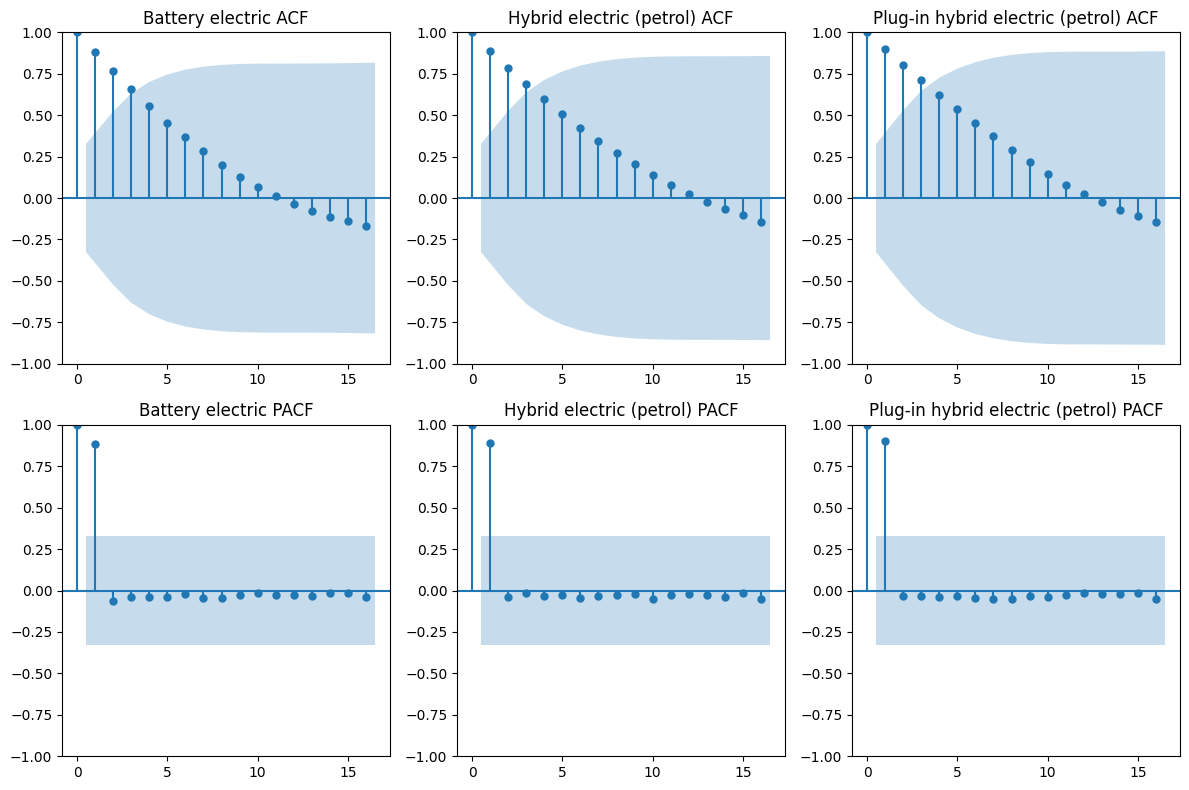

In [68]:
# Plot ACF and PACF for the  significant three fuel type
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
tsa.plot_acf(Battery_electric, ax=axes[0, 0], title='Battery electric ACF')
tsa.plot_pacf(Battery_electric, ax=axes[1, 0], title='Battery electric PACF')
#tsa.plot_acf(Fuel_cell_electric, ax=axes[0, 1], title='Fuel cell electric ACF')
#tsa.plot_pacf(Fuel_cell_electric, ax=axes[1, 1], title='Fuel cell electric PACF')
#tsa.plot_acf(Hybrid_electric_diesel, ax=axes[0, 2], title='Hybrid electric (diesel) ACF')
#tsa.plot_pacf(Hybrid_electric_diesel, ax=axes[1, 2], title='Hybrid electric (diesel) PACF')
tsa.plot_acf(Hybrid_electric_petrol, ax=axes[0, 1], title='Hybrid electric (petrol) ACF')
tsa.plot_pacf(Hybrid_electric_petrol, ax=axes[1, 1], title='Hybrid electric (petrol) PACF')
#tsa.plot_acf(Plug_in_hybrid_electric_diesel, ax=axes[0, 4], title='Plug-in hybrid electric (diesel) ACF')
#tsa.plot_pacf(Plug_in_hybrid_electric_diesel, ax=axes[1, 4], title='Plug-in hybrid electric (diesel) PACF')
tsa.plot_acf(Plug_in_hybrid_electric_petrol, ax=axes[0, 2], title='Plug-in hybrid electric (petrol) ACF')
tsa.plot_pacf(Plug_in_hybrid_electric_petrol, ax=axes[1, 2], title='Plug-in hybrid electric (petrol) PACF')
#tsa.plot_acf(Range_extended_electric, ax=axes[0, 6], title='Range extended electric ACF')
#tsa.plot_pacf(Range_extended_electric, ax=axes[1, 6], title='Range extended electric PACF')

plt.tight_layout()
plt.show()

In [69]:

Battery_electric_df = ev_df[ev_df['Fuel'] == 'Battery electric'].drop('Fuel', axis=1)
Fuel_cell_electric_df = ev_df[ev_df['Fuel'] == 'Fuel cell electric'].drop('Fuel', axis=1)
Hybrid_electric_diesel_df = ev_df[ev_df['Fuel'] == 'Hybrid electric (diesel)'].drop('Fuel', axis=1)
Hybrid_electric_petrol_df = ev_df[ev_df['Fuel'] == 'Hybrid electric (petrol)'].drop('Fuel', axis=1)
Plug_in_hybrid_electric_diesel_df = ev_df[ev_df['Fuel'] == 'Plug-in hybrid electric (diesel)'].drop('Fuel', axis=1)
Plug_in_hybrid_electric_petrol_df = ev_df[ev_df['Fuel'] == 'Plug-in hybrid electric (petrol)'].drop('Fuel', axis=1)
Range_extended_electric_df = ev_df[ev_df['Fuel'] == 'Range extended electric'].drop('Fuel', axis=1)


In [70]:
Battery_electric_df = Battery_electric_df.T.reset_index()
#Battery_electric_df.columns = ['Date', 'Quantity']
BE_df = Battery_electric_df.rename(columns={'index': 'Date', 0:'Quantity'})

Hybrid_electric_petrol_df = Hybrid_electric_petrol_df.T.reset_index()
HEP_df = Hybrid_electric_petrol_df.rename(columns={'index': 'Date', 3:'Quantity'})

Plug_in_hybrid_electric_petrol_df = Plug_in_hybrid_electric_petrol_df.T.reset_index()
PHEP_df = Plug_in_hybrid_electric_petrol_df.rename(columns={'index': 'Date', 5:'Quantity'})

In [71]:
def parse_quarter(date_str):
  # Extract year and quarter information
  year = int(date_str[:4])
  quarter = int(date_str[-1])
  # Create datetime object with appropriate month for the quarter
  return pd.to_datetime(f"{year}-{quarter * 3 - 2:02d}-01")

# Apply the custom function to your 'Date' column
BE_df['Date'] = BE_df['Date'].apply(parse_quarter)
HEP_df['Date'] = HEP_df['Date'].apply(parse_quarter)
PHEP_df['Date'] = PHEP_df['Date'].apply(parse_quarter)
# Set 'Date' as the index
BE_df.set_index('Date', inplace=True)
HEP_df.set_index('Date', inplace=True)
PHEP_df.set_index('Date', inplace=True)

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

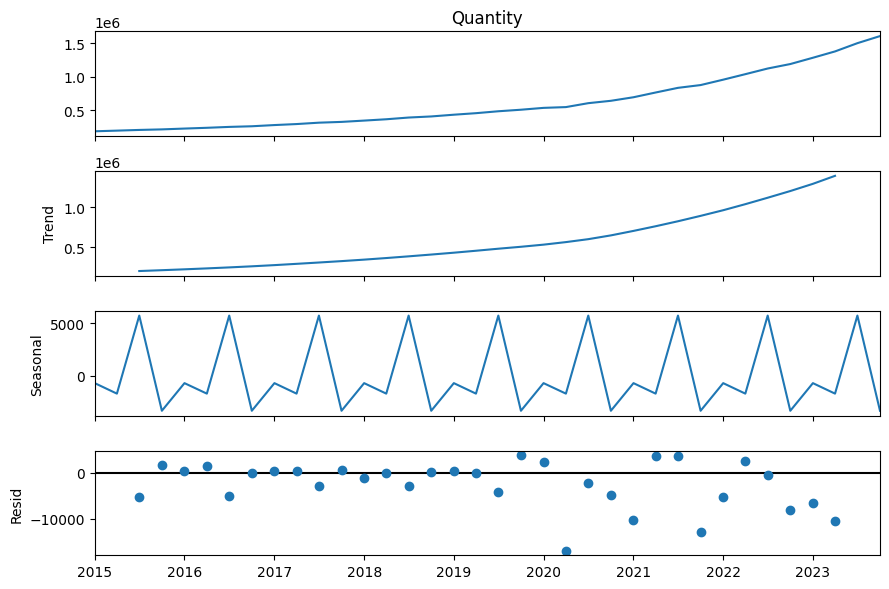

In [73]:
additive_decomposition = seasonal_decompose(HEP_df['Quantity'], model='additive')
fig = additive_decomposition.plot()
fig.set_size_inches((9,6))
fig.tight_layout()
plt.show()

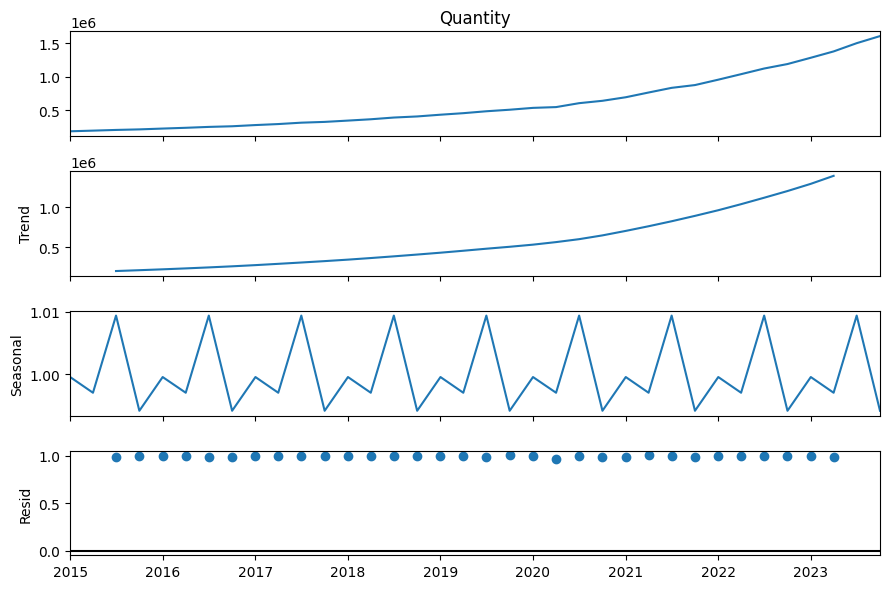

In [74]:
multiplicative_decomposition = seasonal_decompose(HEP_df['Quantity'], model='multiplicative')
fig = multiplicative_decomposition.plot()
fig.set_size_inches((9,6))
fig.tight_layout()
plt.show()

In [75]:
HEP = HEP_df
HEP

,Quantity
Date,
2015-01-01,186881
2015-04-01,196672
2015-07-01,207000
2015-10-01,215180
2016-01-01,227402
2016-04-01,238867
2016-07-01,252133
2016-10-01,261569
2017-01-01,279465


In [76]:
HEP_df['log_Quantity'] = np.log(HEP_df['Quantity'])

In [77]:
#HEP['Quantity'] = np.exp(HEP['Quantity'])

In [78]:
from numpy import log
result = adfuller(HEP_df['log_Quantity'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.666420
p-value: 1.000000


In [79]:
first_difference = HEP_df['log_Quantity'].diff().dropna()

In [80]:
second_difference = first_difference.diff().dropna()

In [81]:
third_difference = second_difference.diff().dropna()

In [82]:
adf_result = adfuller(second_difference)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -6.803459986327356
p-value: 2.206922964100705e-09


**Splitting**

In [83]:
train = second_difference.iloc[:-4]
test= second_difference.iloc[-4:]

In [84]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [86]:
# Define error metrics
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mae(actual, predicted):
    return mean_absolute_error(actual, predicted)

**AutoARIMA**

In [87]:
import pmdarima as pm
# Fit AutoARIMA
auto_arima_model = pm.auto_arima(train, seasonal=False, trace=True)
auto_arima_forecast = auto_arima_model.predict(n_periods=4)

# Calculate metrics for AutoARIMA
auto_arima_rmse = calculate_rmse(test, auto_arima_forecast)
auto_arima_mape = calculate_mape(test, auto_arima_forecast)
auto_arima_mae = calculate_mae(test, auto_arima_forecast)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-152.905, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.674, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-148.651, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-151.737, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-155.350, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-152.069, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-152.345, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-151.462, Time=2.45 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-150.329, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-150.351, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-151.443, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 3.733 seconds


In [88]:
future_periods = 12  # Forecasting for 3 years (4 quarters per year)
auto_arima_future_forecast = auto_arima_model.predict(n_periods=future_periods)

print("AutoARIMA Future Forecast (2024-2026):")
print(auto_arima_future_forecast)

AutoARIMA Future Forecast (2024-2026):
2023-01-01    0.023229
2023-04-01   -0.016025
2023-07-01    0.016011
2023-10-01   -0.015998
2024-01-01    0.015985
2024-04-01   -0.015971
2024-07-01    0.015958
2024-10-01   -0.015945
2025-01-01    0.015932
2025-04-01   -0.015918
2025-07-01    0.015905
2025-10-01   -0.015892
Freq: QS-OCT, dtype: float64


**AutoETS**

In [89]:
auto_ets_model = ExponentialSmoothing(train, seasonal=None).fit()
auto_ets_forecast = auto_ets_model.forecast(steps=4)

# Calculate metrics for AutoETS
auto_ets_rmse = calculate_rmse(test, auto_ets_forecast)
auto_ets_mape = calculate_mape(test, auto_ets_forecast)
auto_ets_mae = calculate_mae(test, auto_ets_forecast)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [90]:
auto_ets_future_forecast = auto_ets_model.forecast(steps=future_periods)

print("AutoETS Future Forecast (2024-2026):")
print(auto_ets_future_forecast)

AutoETS Future Forecast (2024-2026):
2023-01-01    0.000119
2023-04-01    0.000119
2023-07-01    0.000119
2023-10-01    0.000119
2024-01-01    0.000119
2024-04-01    0.000119
2024-07-01    0.000119
2024-10-01    0.000119
2025-01-01    0.000119
2025-04-01    0.000119
2025-07-01    0.000119
2025-10-01    0.000119
Freq: QS-OCT, dtype: float64


**Holt-Winters**

In [91]:
# Fit Holt-Winters model
holt_winters_model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12).fit()
holt_winters_forecast = holt_winters_model.forecast(steps=4)

# Calculate metrics for Holt-Winters
holt_winters_rmse = calculate_rmse(test, holt_winters_forecast)
holt_winters_mape = calculate_mape(test, holt_winters_forecast)
holt_winters_mae = calculate_mae(test, holt_winters_forecast)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [92]:
holt_winters_future_forecast = holt_winters_model.forecast(steps=future_periods)

print("Holt-Winters Future Forecast (2024-2026):")
print(holt_winters_future_forecast)

Holt-Winters Future Forecast (2024-2026):
2023-01-01    0.017113
2023-04-01   -0.023510
2023-07-01    0.046839
2023-10-01   -0.038609
2024-01-01    0.021224
2024-04-01    0.006815
2024-07-01   -0.000040
2024-10-01   -0.027430
2025-01-01    0.024560
2025-04-01   -0.008646
2025-07-01    0.002514
2025-10-01   -0.018423
Freq: QS-OCT, dtype: float64


**Historic Average (Mean)**

In [93]:
historic_avg_forecast = np.mean(train) * np.ones(len(test))

# Calculate metrics for Historic Average
historic_avg_rmse = calculate_rmse(test, historic_avg_forecast)
historic_avg_mape = calculate_mape(test, historic_avg_forecast)
historic_avg_mae = calculate_mae(test, historic_avg_forecast)

In [94]:
# Extend the forecast for Historic Average (mean of the training data)
historic_avg_future_forecast = np.mean(train) * np.ones(future_periods)
print("Historic Average Future Forecast (2024-2026):")
print(historic_avg_future_forecast)

Historic Average Future Forecast (2024-2026):
[0.00021966 0.00021966 0.00021966 0.00021966 0.00021966 0.00021966
 0.00021966 0.00021966 0.00021966 0.00021966 0.00021966 0.00021966]


**Naive Forecast**

In [95]:
naive_forecast = np.repeat(train.iloc[-1], len(test))

# Calculate metrics for Naive Forecast
naive_rmse = calculate_rmse(test, naive_forecast)
naive_mape = calculate_mape(test, naive_forecast)
naive_mae = calculate_mae(test, naive_forecast)

In [96]:
# Extend the forecast for Naive (last observation carried forward)
naive_future_forecast = np.repeat(train.iloc[-1], future_periods)
print("Naive Future Forecast (2024-2026):")
print(naive_future_forecast)

Naive Future Forecast (2024-2026):
[-0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736
 -0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736]


**Decision Tree**

In [97]:
from sklearn.tree import DecisionTreeRegressor

# Prepare data for Decision Tree
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train.values
X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

# Fit Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_forecast = dt_model.predict(X_test)

# Calculate metrics for Decision Tree
dt_rmse = calculate_rmse(test, dt_forecast)
dt_mape = calculate_mape(test, dt_forecast)
dt_mae = calculate_mae(test, dt_forecast)

In [98]:
# Extend the forecast for Decision Tree
X_future = np.arange(len(train), len(train) + future_periods).reshape(-1, 1)
dt_future_forecast = dt_model.predict(X_future)
print("Decision Tree Future Forecast (2024-2026):")
print(dt_future_forecast)

Decision Tree Future Forecast (2024-2026):
[-0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736
 -0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736 -0.0203736]


**AR (Auto-Regressive)**

In [99]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model
ar_model = AutoReg(train, lags=5).fit()  # You can adjust lags as needed
ar_forecast = ar_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate metrics for AR
ar_rmse = calculate_rmse(test, ar_forecast)
ar_mape = calculate_mape(test, ar_forecast)
ar_mae = calculate_mae(test, ar_forecast)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [100]:
# Extend the forecast for AR model
ar_future_forecast = ar_model.predict(start=len(train), end=len(train) + future_periods - 1, dynamic=False)
print("AR Future Forecast (2024-2026):")
print(ar_future_forecast)

AR Future Forecast (2024-2026):
2023-01-01    0.036642
2023-04-01   -0.025671
2023-07-01    0.012153
2023-10-01   -0.004053
2024-01-01    0.014192
2024-04-01   -0.021923
2024-07-01    0.022181
2024-10-01   -0.011493
2025-01-01    0.008576
2025-04-01   -0.009617
2025-07-01    0.016585
2025-10-01   -0.015045
Freq: QS-OCT, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


**MA (Moving Average)**

In [101]:
from statsmodels.tsa.arima.model import ARIMA
# Fit MA model
ma_model = ARIMA(train, order=(0, 0, 5)).fit()  # Order (0, 0, q) for MA(q) model
ma_forecast = ma_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate metrics for MA
ma_rmse = calculate_rmse(test, ma_forecast)
ma_mape = calculate_mape(test, ma_forecast)
ma_mae = calculate_mae(test, ma_forecast)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

In [102]:
ma_future_forecast = ma_model.predict(start=len(train), end=len(train) + future_periods - 1, dynamic=False)
print("MA Future Forecast (2024-2026):")
print(ma_future_forecast)

MA Future Forecast (2024-2026):
2023-01-01    0.026538
2023-04-01   -0.001703
2023-07-01    0.000881
2023-10-01   -0.006199
2024-01-01    0.005304
2024-04-01    0.001109
2024-07-01    0.001109
2024-10-01    0.001109
2025-01-01    0.001109
2025-04-01    0.001109
2025-07-01    0.001109
2025-10-01    0.001109
Freq: QS-OCT, Name: predicted_mean, dtype: float64


**ARIMA**

In [103]:
arima_model = ARIMA(train, order=(1, 0, 1)).fit()  # Example: ARIMA(1,0,1)
arima_forecast = arima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate metrics for ARIMA
arima_rmse = calculate_rmse(test, arima_forecast)
arima_mape = calculate_mape(test, arima_forecast)
arima_mae = calculate_mae(test, arima_forecast)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [104]:
# Extend the forecast for ARIMA model
arima_future_forecast = arima_model.predict(start=len(train), end=len(train) + future_periods - 1, dynamic=False)
print("ARIMA Future Forecast (2024-2026):")
print(arima_future_forecast)

ARIMA Future Forecast (2024-2026):
2023-01-01    0.022952
2023-04-01   -0.004326
2023-07-01    0.002347
2023-10-01    0.000714
2024-01-01    0.001114
2024-04-01    0.001016
2024-07-01    0.001040
2024-10-01    0.001034
2025-01-01    0.001035
2025-04-01    0.001035
2025-07-01    0.001035
2025-10-01    0.001035
Freq: QS-OCT, Name: predicted_mean, dtype: float64


**SARIMA**

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()  # Example seasonal_order
sarima_forecast = sarima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate metrics for SARIMA
sarima_rmse = calculate_rmse(test, sarima_forecast)
sarima_mape = calculate_mape(test, sarima_forecast)
sarima_mae = calculate_mae(test, sarima_forecast)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63577D+00    |proj g|=  5.69316D+00


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f= -2.64685D+00    |proj g|=  7.79620D+00

At iterate   10    f= -2.67244D+00    |proj g|=  8.95676D-02

At iterate   15    f= -2.67278D+00    |proj g|=  7.65822D-01

At iterate   20    f= -2.67814D+00    |proj g|=  7.52403D-01

At iterate   25    f= -2.67903D+00    |proj g|=  1.09428D-01

At iterate   30    f= -2.68235D+00    |proj g|=  1.00227D+00

At iterate   35    f= -2.68353D+00    |proj g|=  3.56807D-02

At iterate   40    f= -2.69268D+00    |proj g|=  7.13376D-01

At iterate   45    f= -2.69642D+00    |proj g|=  1.16214D+00

At iterate   50    f= -2.69745D+00    |proj g|=  1.77155D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [106]:
# Extend the forecast for SARIMA model
sarima_future_forecast = sarima_model.predict(start=len(train), end=len(train) + future_periods - 1, dynamic=False)
print("SARIMA Future Forecast (2024-2026):")
print(sarima_future_forecast)

SARIMA Future Forecast (2024-2026):
2023-01-01    0.022091
2023-04-01   -0.016301
2023-07-01    0.030516
2023-10-01   -0.023644
2024-01-01    0.013760
2024-04-01    0.004094
2024-07-01    0.000422
2024-10-01   -0.018817
2025-01-01    0.018470
2025-04-01   -0.005183
2025-07-01    0.002217
2025-10-01   -0.012302
Freq: QS-OCT, Name: predicted_mean, dtype: float64


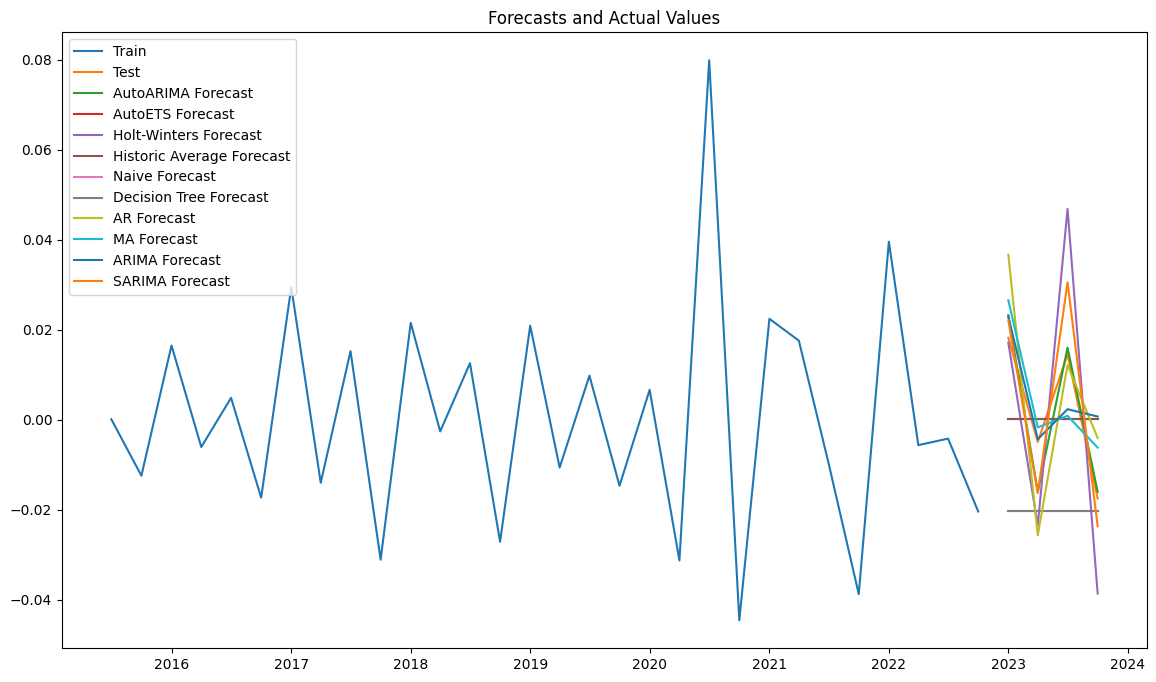

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, auto_arima_forecast, label='AutoARIMA Forecast')
plt.plot(test.index, auto_ets_forecast, label='AutoETS Forecast')
plt.plot(test.index, holt_winters_forecast, label='Holt-Winters Forecast')
plt.plot(test.index, historic_avg_forecast, label='Historic Average Forecast')
plt.plot(test.index, naive_forecast, label='Naive Forecast')
plt.plot(test.index, dt_forecast, label='Decision Tree Forecast')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, ma_forecast, label='MA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend(loc='best')
plt.title('Forecasts and Actual Values')
plt.show()

In [108]:
# Display metrics for each model
print(f"AutoARIMA - RMSE: {auto_arima_rmse:.4f},  MAE: {auto_arima_mae:.4f}")
print(f"AutoETS - RMSE: {auto_ets_rmse:.4f}, MAE: {auto_ets_mae:.4f}")
print(f"Holt-Winters - RMSE: {holt_winters_rmse:.4f}, MAE: {holt_winters_mae:.4f}")
print(f"Historic Average - RMSE: {historic_avg_rmse:.4f}, MAE: {historic_avg_mae:.4f}")
print(f"Naive - RMSE: {naive_rmse:.4f}, MAE: {naive_mae:.4f}")
print(f"Decision Tree - RMSE: {dt_rmse:.4f}, MAE: {dt_mae:.4f}")
print(f"AR - RMSE: {ar_rmse:.4f}, MAE: {ar_mae:.4f}")
print(f"MA - RMSE: {ma_rmse:.4f}, MAE: {ma_mae:.4f}")
print(f"ARIMA - RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}")
print(f"SARIMA - RMSE: {sarima_rmse:.4f}, MAE: {sarima_mae:.4f}")

AutoARIMA - RMSE: 0.0062,  MAE: 0.0048
AutoETS - RMSE: 0.0148, MAE: 0.0138
Holt-Winters - RMSE: 0.0214, MAE: 0.0183
Historic Average - RMSE: 0.0147, MAE: 0.0138
Naive - RMSE: 0.0272, MAE: 0.0230
Decision Tree - RMSE: 0.0272, MAE: 0.0230
AR - RMSE: 0.0155, MAE: 0.0137
MA - RMSE: 0.0099, MAE: 0.0091
ARIMA - RMSE: 0.0112, MAE: 0.0089
SARIMA - RMSE: 0.0105, MAE: 0.0093


In [109]:
metrics_data = {
    'Model': [
        'AutoARIMA', 'AutoETS', 'HoltWinters', 'HistoricAverage', 
        'Naive', 'DecisionTree', 'AR', 'MA', 'ARIMA', 'SARIMA'
    ],
    'RMSE': [
        auto_arima_rmse, auto_ets_rmse, holt_winters_rmse, historic_avg_rmse, 
        naive_rmse, dt_rmse, ar_rmse, ma_rmse, arima_rmse, sarima_rmse
    ],
    'MAE': [
        auto_arima_mae, auto_ets_mae, holt_winters_mae, historic_avg_mae, 
        naive_mae, dt_mae, ar_mae, ma_mae, arima_mae, sarima_mae
    ]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
metrics_df

,Model,RMSE,MAE
0,AutoARIMA,0.006170,0.004764
1,AutoETS,0.014762,0.013801
2,HoltWinters,0.021417,0.018271
3,HistoricAverage,0.014745,0.013801
4,Naive,0.027180,0.022955
5,DecisionTree,0.027180,0.022955
6,AR,0.015455,0.013745
7,MA,0.009924,0.009129
8,ARIMA,0.011216,0.008939
9,SARIMA,0.010451,0.009337


In [110]:
# --- Reverse the differencing and log transformation ---

# Retrieve the last observed value before differencing
last_log_value = HEP_df['log_Quantity'].iloc[-1]
last_diff_value = HEP_df['log_Quantity'].iloc[-2]

In [111]:
# Function to reverse the second differencing
def reverse_second_diff(forecast, last_value, last_diff_value):
    # Reconstruct the first differencing from second differencing forecast
    first_diff_forecast = forecast.cumsum() + last_value
    # Reconstruct the original log-transformed series
    original_series = first_diff_forecast.cumsum() + last_diff_value
    return original_series

In [112]:
# Reversing transformations for AutoARIMA forecast
auto_arima_reversed = reverse_second_diff(auto_arima_future_forecast, last_log_value, last_diff_value)
# Reversing transformations for AutoETS forecast
auto_ets_reversed = reverse_second_diff(auto_ets_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
holt_winters_reversed = reverse_second_diff(holt_winters_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
historic_avg_reversed = reverse_second_diff(historic_avg_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
naive_reversed = reverse_second_diff(naive_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
dt_reversed = reverse_second_diff(dt_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
ar_reversed = reverse_second_diff(ar_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
ma_reversed = reverse_second_diff(ma_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
arima_reversed = reverse_second_diff(arima_future_forecast, last_log_value, last_diff_value)

# Reversing transformations for Holt-Winters forecast
sarima_reversed = reverse_second_diff(sarima_future_forecast, last_log_value, last_diff_value)

In [113]:
# Exponentiating to reverse log transformation
auto_arima_reversed = np.exp(auto_arima_reversed)
auto_ets_reversed = np.exp(auto_ets_reversed)
holt_winters_reversed = np.exp(holt_winters_reversed)
historic_avg_reversed = np.exp(historic_avg_reversed)
naive_reversed = np.exp(naive_reversed)
dt_reversed = np.exp(dt_reversed)
ar_reversed = np.exp(ar_reversed)
ma_reversed = np.exp(ma_reversed)
arima_reversed = np.exp(arima_reversed)
sarima_reversed = np.exp(sarima_reversed)

In [114]:
sarima_reversed

2023-01-01    2.454320e+12
2023-04-01    3.957088e+18
2023-07-01    6.577690e+24
2023-10-01    1.067831e+31
2024-01-01    1.757549e+37
2024-04-01    2.904625e+43
2024-07-01    4.802374e+49
2024-10-01    7.792012e+55
2025-01-01    1.287848e+62
2025-04-01    2.117524e+68
2025-07-01    3.489434e+74
2025-10-01    5.679875e+80
Freq: QS-OCT, Name: predicted_mean, dtype: float64

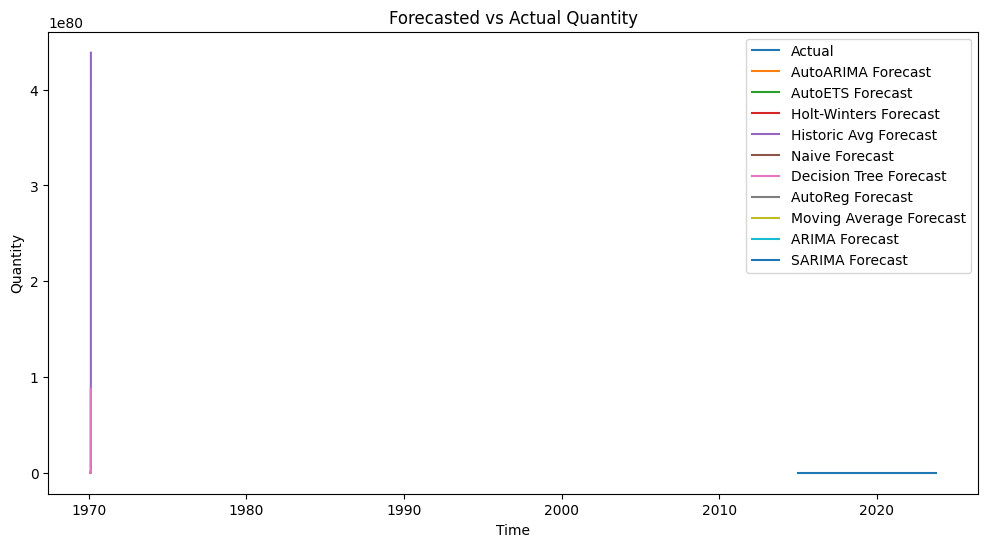

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(HEP_df['Quantity'], label='Actual')
plt.plot(pd.Series(auto_arima_reversed, index=range(len(HEP_df), len(HEP_df) + len(auto_arima_reversed))), label='AutoARIMA Forecast')
plt.plot(pd.Series(auto_ets_reversed, index=range(len(HEP_df), len(HEP_df) + len(auto_ets_reversed))), label='AutoETS Forecast')
plt.plot(pd.Series(holt_winters_reversed, index=range(len(HEP_df), len(HEP_df) + len(holt_winters_reversed))), label='Holt-Winters Forecast')
plt.plot(pd.Series(historic_avg_reversed, index=range(len(HEP_df), len(HEP_df) + len(historic_avg_reversed))), label='Historic Avg Forecast')
plt.plot(pd.Series(naive_reversed, index=range(len(HEP_df), len(HEP_df) + len(naive_reversed))), label='Naive Forecast')
plt.plot(pd.Series(dt_reversed, index=range(len(HEP_df), len(HEP_df) + len(dt_reversed))), label='Decision Tree Forecast')
plt.plot(pd.Series(ar_reversed, index=range(len(HEP_df), len(HEP_df) + len(ar_reversed))), label='AutoReg Forecast')
plt.plot(pd.Series(ma_reversed, index=range(len(HEP_df), len(HEP_df) + len(ma_reversed))), label='Moving Average Forecast')
plt.plot(pd.Series(arima_reversed, index=range(len(HEP_df), len(HEP_df) + len(arima_reversed))), label='ARIMA Forecast')
plt.plot(pd.Series(sarima_reversed, index=range(len(HEP_df), len(HEP_df) + len(sarima_reversed))), label='SARIMA Forecast')
plt.legend()
plt.title('Forecasted vs Actual Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.show()

In [116]:
# Determine the forecast start date
forecast_start_date = HEP_df.index[-1]

In [117]:
# Create a DataFrame to hold the actual and predicted values
forecast_dates = pd.date_range(start=forecast_start_date, periods=future_periods+1, freq='Q')[1:]

/tmp/ipykernel_36/1301667613.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=forecast_start_date, periods=future_periods+1, freq='Q')[1:]


In [118]:
# Create a DataFrame with the actual and predicted values
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'AutoARIMA Forecast': auto_arima_reversed,
    'AutoETS Forecast': auto_ets_reversed,
    'Holt-Winters Forecast': holt_winters_reversed,
    'Historic Average Forecast': historic_avg_reversed,
    'Naive Forecast' : naive_reversed,
    'DT Forecast' : dt_reversed,
    'AR Forecast' : ar_reversed,
    'MA Forecast' : ma_reversed,
    'ARIMA Forecast' : arima_reversed,
    'SARIMA Forecast' : sarima_reversed
})

In [119]:
# Add the last known actual values
actual_last_values = HEP_df['Quantity'].iloc[-4:].values
actual_dates = HEP_df.index[-4:]

In [120]:
# Creating a DataFrame for actual values and concatenating with forecasted DataFrame
actual_df = pd.DataFrame({'Date': actual_dates, 'Actual': actual_last_values})
full_table = pd.concat([actual_df.set_index('Date'), forecast_df.set_index('Date')], axis=0).reset_index()


In [121]:
full_table

,Date,Actual,AutoARIMA Forecast,AutoETS Forecast,Holt-Winters Forecast,Historic Average Forecast,Naive Forecast,DT Forecast,AR Forecast,MA Forecast,ARIMA Forecast,SARIMA Forecast
0,2023-01-01,1280796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-01,1374946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-07-01,1497639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-01,1602987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-31,NaN,2.457116e+12,2.400982e+12,2.442133e+12,2.401223e+12,2.352280e+12,2.352280e+12,2.490293e+12,2.465258e+12,2.456435e+12,2.454320e+12
5,2024-06-30,NaN,3.967205e+18,3.849660e+18,3.889747e+18,3.850821e+18,3.620118e+18,3.620118e+18,4.035945e+18,4.051147e+18,4.011664e+18,3.957088e+18
6,2024-09-30,NaN,6.508746e+24,6.173161e+24,6.492548e+24,6.176885e+24,5.458940e+24,5.458940e+24,6.620915e+24,6.663102e+24,6.566940e+24,6.577690e+24
7,2024-12-31,NaN,1.050902e+31,9.900215e+30,1.042657e+31,9.910170e+30,8.065768e+30,8.065768e+30,1.081759e+31,1.089138e+31,1.075751e+31,1.067831e+31
8,2025-03-31,NaN,1.724126e+37,1.587937e+37,1.710349e+37,1.590333e+37,1.167710e+37,1.167710e+37,1.792696e+37,1.789752e+37,1.764185e+37,1.757549e+37
9,2025-06-30,NaN,2.783810e+43,2.547263e+43,2.824804e+43,2.552646e+43,1.656442e+43,1.656442e+43,2.906442e+43,2.944317e+43,2.896128e+43,2.904625e+43
